In [1]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Jeffares/Jeffares 2015 measurements and LTRs.xlsx,
#  sheet 4,
#  starting from row 17
data = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Jeffares/Jeffares 2015 measurements and LTRs.xlsx', sheet_name=4, header=16)
#remove entries where misc.flocculation is NaN
data = data[data['misc.flocculation'].notna()]

strain = data['strain']
flocculation = data['misc.flocculation']
#remove misc.flocculation column
data = data.drop(columns=['misc.flocculation'])
#see if any column has string entries and remove them
for col in data.columns:
    if data[col].dtype == 'O':
        print(col)
        data = data.drop(col,axis=1)


strain
shape1.lengthtype.liquid
misc.mating.type
shape1.liquid
shape1.solid


/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
#There are multiple different ways to assess significance for each variable.
# Is your coefficient bigger than what would be expected if the data was random?
# -Get the coefficient. Then see how the coefficient changes if you permute the data. Is your original coefficient singnificantly out of this distribution?
# Is your coefficient bigger than 0?
# -Get a confidence interval for the coefficient by bootstrapping. See which quantile 0 is at. Is your coefficient significantly out of this distribution?
# Is your model significant than no model (normal frequency of values)?


In [12]:
#perform logistic regression on all columns to predict misc.flocculation using scikit without splitting the data into training and test sets
from sklearn.linear_model import LogisticRegression
#initialise the model
logreg = LogisticRegression()
#create a dataframe to store the results: columns strain, length of data, score and coefficients
results = pd.DataFrame(columns=['measurement','n_measurement','score','coefficients'])
#for each column subset the data such that there are no NaN values. Then fit the model and print the score. Join dfs using pd.concat
for col in data.columns:
    temp_data = data[col].dropna()
    temp_flocculation = flocculation[temp_data.index]
    logreg.fit(temp_data.values.reshape(-1,1), temp_flocculation)
    #save the score
    score = logreg.score(temp_data.values.reshape(-1,1), temp_flocculation)
    #save the coefficients
    coefficients = logreg.coef_
    #get confidence interval of the coefficients by bootstrapping and see if they are significantly different from 0
    null_coefs = []
    for i in range(10000):
        scrambled_flocculation = np.random.permutation(temp_flocculation)
        logreg.fit(temp_data.values.reshape(-1,1), scrambled_flocculation)
        null_coefs.append(logreg.coef_[0][0])
    p_value = np.sum(np.abs(null_coefs) > np.abs(coefficients))/len(null_coefs)
    temp_results = pd.DataFrame({'measurement': [col],'n_measurement':[len(temp_data)], 'score': score, 'coefficients': logreg.coef_[0], 'p_value': p_value})
    results = pd.concat([results, temp_results], ignore_index=True)
#correct the p_values by simple bonferroni correction
results['p_value_corrected'] = results['p_value']*len(results)
#sort the results by score
results = results.sort_values(by='p_value_corrected', ascending=True)




TypeError: 'float' object is not subscriptable

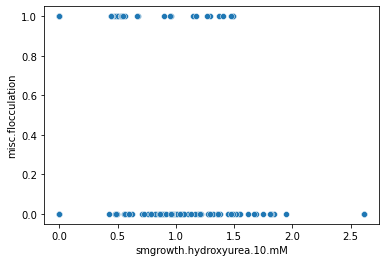

In [13]:
#plot smgrowth.hydroxyurea.10.mM	 vs flocculation including logistic curve
sns.scatterplot(x='smgrowth.hydroxyurea.10.mM', y=flocculation, data=data)
#logistic curve
x = np.linspace(-100, 10, 200)
y = 1/(1+np.exp(-results['coefficients'][75][0][0]*x))
plt.plot(x, y, color='red')
plt.show()


<AxesSubplot:xlabel='smgrowth.UV.187.2.J.m2', ylabel='misc.flocculation'>

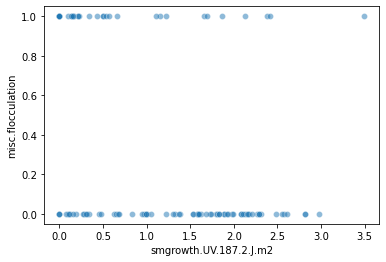

In [ ]:
#vs smgrowth.UV.187.2.J.m2	
sns.scatterplot(x='smgrowth.UV.187.2.J.m2', y=flocculation, data=data,alpha=0.5)

<AxesSubplot:xlabel='smgrowth.EDTA.1.mM', ylabel='misc.flocculation'>

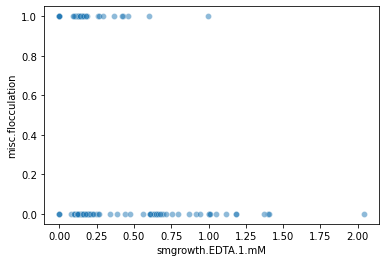

In [ ]:
#vs smgrowth.EDTA.1.mM
sns.scatterplot(x='smgrowth.EDTA.1.mM', y=flocculation, data=data,alpha=0.5)

In [ ]:
#show results with p_values less than 0.05
results[results['p_value']<0.05]

,measurement,n_measurement,score,coefficients,p_value,p_value_corrected
75,smgrowth.hydroxyurea.10.mM,105,0.714286,[[0.13702754088331828]],0.0000,0.0000
76,smgrowth.hydroxyurea.15.mM,105,0.72381,[[0.0912649857129298]],0.0000,0.0000
95,smgrowth.UV.187.2.J.m2,104,0.721154,[[-0.3618275877512124]],0.0001,0.0224
67,smgrowth.EDTA.1.mM,107,0.682243,[[-0.17156981782685737]],0.0001,0.0224
36,shape1.facs.percent2to4C,47,0.765957,[[-0.02810679261956009]],0.0005,0.1120
35,shape1.facs.percent2C,47,0.765957,[[-0.0072123445580132015]],0.0008,0.1792
57,smgrowth.Brefeldin.A.80.uM,107,0.682243,[[-0.056756193133517485]],0.0012,0.2688
50,shape2.KL.Predicted.Tshape,108,0.703704,[[0.39750166105987655]],0.0014,0.3136
104,wb.Arabinose2.Rate,74,0.743243,[[-0.4280415036512992]],0.0014,0.3136
56,smgrowth.Brefeldin.A.40.uM,107,0.719626,[[-0.47702803246282904]],0.0016,0.3584
